# Loi des coefficients de la régression linéaire

Le but de cet exemple est de montrer comment calculer la loi des coefficients de la régression linéaire par moindres carrés. On fait l'hypothèse que les résidus suivent la loi gaussienne. Nous calculons les paramètres de la loi gaussienne des paramètres, c'est à dire la moyenne et la matrice de covariance. Un des objectifs de cet exemple est de montrer comment utiliser la classe `DesignProxy` sur un exemple relativement simple. Dans la seconde partie de cet exemple, nous montrons comment utiliser cette classe dans le contexte d'une méthode de sélection de modèle.

## Propriétés de la régression linéaire

**Hypothèses** _(Hypothèses du modèle de regression linéaire)_
On considère le modèle :
$$
\boldsymbol{Y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$
où $\boldsymbol{Y}$ est le vecteur aléatoire de dimension $n$ représentant les observations, $X$ 
est la matrice de conception de taille $n\times p$, $\boldsymbol{\beta}$ est le vecteur de 
dimension $p$ représentant les paramètres et $\boldsymbol{\epsilon}$ est un vecteur aléatoire 
de dimension $n$. 

La définition suivante introduit le problème des moindres carrés linéaires. 

**Définition** _(Moindres carrés linéaires)_
Soit $\boldsymbol{Y}$ une réalisation du vecteur aléatoire $\boldsymbol{Y}$. 
La méthode des moindres carrés non linéaires consiste à rechercher 
$\widehat{\boldsymbol{\beta}}$ tel que : 
$$
\widehat{\boldsymbol{\beta}}
\in \textrm{argmin}_{\boldsymbol{\beta}\in\mathbb{R}^p} \frac{1}{2} \| \boldsymbol{Y} - X \boldsymbol{\beta} \|_2^2.
$$

Le théorème suivant présente la solution du problème des moindres carrés linéaires. 

**Théorème** _(Solution des équations normales)_
L'estimateur des moindres carrés $\hat{\boldsymbol{\beta}}$ est solution des équations 
normales :
$$
X^T X \widehat{\boldsymbol{\beta}} = X^T \boldsymbol{Y}.
$$
Si $X$ est de rang plein, alors :
$$
\widehat{\boldsymbol{\beta}} = \left(X^T X\right)^{-1} X^T \boldsymbol{Y}.
$$
Dans ce cas, le vecteur des prédictions est :
$$
\widehat{\boldsymbol{Y}} = X \widehat{\boldsymbol{\beta}}.
$$

La démonstration est fondée sur le fait que, si $X$ est de rang plein, 
alors la matrice $X^T X$ est inversible. 

Nous nous intéressons aux prédictions du modèle de régression. 
Nous avons vu comment évaluer le vecteur des prédictions $\hat{\boldsymbol{Y}}$ en fonction 
du vecteur de l'estimateur des paramètres $\hat{\boldsymbol{\beta}}$. 
Le théorème suivant présente une expression du vecteur des prédictions $\hat{\boldsymbol{Y}}$ 
en fonction du vecteur des observations $\boldsymbol{Y}$. 

**Théorème** _(Prédictions)_
Le vecteur des prédictions du modèle de régression linéaires est :
$$
\widehat{\boldsymbol{Y}} = P \boldsymbol{Y}
$$
où $P$ est la matrice de projection, de taille $n\times n$ :
$$
P = X \left(X^T X\right)^{-1} X^T.
$$

Dans le but d'estimer l'erreur de prédiction, nous introduisons le vecteur 
des différences entre les prédictions et les observations. 

**Définition** _(Résidus)_
Le vecteur des résidus est :
$$
\boldsymbol{r} = \boldsymbol{Y} - \widehat{\boldsymbol{Y}}.
$$

Par conséquent,
$$
\boldsymbol{r} = (I - P) \boldsymbol{Y}
$$
où $I$ est la matrice identité.

Pour obtenir les résultats qui vont suivrent, nous aurons besoin 
de l'hypothèse suivante sur le vecteur des résidus.

**Hypothèses** _(Espérance et covariance du résidu)_
On fait l'hypothèse que 
$$
\mathbb{E}\left[\boldsymbol{\epsilon}\right] = \boldsymbol{0}
$$
et
$$
\operatorname{Cov}(\boldsymbol{\epsilon}) = \sigma^2 I,
$$
où $\sigma > 0$ est un réel.

Les hypothèses précédentes spécifient l'espérance et la covariance du vecteur des résidus. 
Ces hypothèses ne sont pas nécessairement associées à une distribution gaussienne. 
Toutefois, comme nous allons le voir dans la section suivante, beaucoup plus 
d'informations peuvent être obtenues si la loi des résidus est gaussienne. 

Nous présentons les principales propriétés du modèle 
de régression linéaire. 
En particulier, nous présentons la loi du vecteur des paramètres et la 
loi du vecteur des résidus. 

Le théorème suivant présente l'espérance et la covariance de la prédiction du 
modèle de régression linéaire. 

**Théorème** _(Espérance et covariance du modèle de régression)_
L'espérance de $\boldsymbol{Y}$ est 
$$
\mathbb{E}[\boldsymbol{Y}] = X \boldsymbol{\beta}
$$
et sa covariance est :
$$
\operatorname{Cov}(\boldsymbol{Y}) = \sigma^2 I.
$$

Si, de plus, $\boldsymbol{\epsilon} \sim \mathcal{N}\left(\boldsymbol{0}, \sigma^2 I\right)$, alors :
$$
\boldsymbol{Y} \sim \mathcal{N}\left(X\boldsymbol{\beta}, \sigma^2 I\right).
$$

Le théorème suivant présente l'espérance et la covariance du vecteur 
des paramètres. 

**Théorème** _(Espérance et covariance du vecteur des paramètres)_
L'espérance de $\hat{\boldsymbol{\beta}}$ est :
$$
\mathbb{E}\left[\widehat{\boldsymbol{\beta}}\right] = \boldsymbol{\beta}
$$
et sa covariance est :
$$
\operatorname{Cov}\left(\widehat{\boldsymbol{\beta}}\right) = \left(X^T X\right)^{-1} \sigma^2.
$$

Si, de plus, $\boldsymbol{\epsilon} \sim \mathcal{N}(\boldsymbol{0}, \sigma^2 I)$, alors :
$$
\widehat{\boldsymbol{\beta}} \sim \mathcal{N}\left(\boldsymbol{\beta}, \left(X^T X\right)^{-1} \sigma^2\right).
$$

## Références

- Nicholas H Bingham and John M Fry. Regression : Linear models in statistics. Springer Science & Business Media, 2010.

## Create a least squares problem

We consider the linear model:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon
$$
where
$$
X_i \sim \mathcal{N}(0, 1)
$$
for $i = 1, ...,3$ are independent and 
$$
\epsilon \sim \mathcal{N}(0, 0.1).
$$
We use the parameters:
$$
\beta_0  = 1, \quad \beta_1  = 2, \quad \beta_2 = -3, \quad \beta_3 = 4.
$$

In [1]:
import openturns as ot
import openturns.viewer as otv
from math import sqrt
import pylab as pl

The following cell defines the $g$ function, based on the linear model.

In [2]:
g_function = ot.SymbolicFunction(
    ["x1", "x2", "x3"], ["1.0 + 2.0 * x1 - 3.0 * x2 + 4.0 * x3"]
)

We then define the distribution of the input random vector.

In [3]:
dist_x1 = ot.Normal(0.0, 1.0)
dist_x2 = ot.Normal(0.0, 1.0)
dist_x3 = ot.Normal(0.0, 1.0)
distribution = ot.JointDistribution([dist_x1, dist_x2, dist_x3])
print(distribution)

JointDistribution(Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), IndependentCopula(dimension = 3))


We generate a sample of the input random vector and evaluate the corresponding output of the $g$ function.

In [4]:
sample_size = 10
input_sample = distribution.getSample(sample_size)
output_sample = g_function(input_sample)
output_sample[:5]

,y0
0,4.91968
1,-0.5322588
2,2.841348
3,3.832763
4,2.467041


In order to create noisy observations of the output, we create a gaussian random variable, generate a sample and add it to the output sample. This produces the observed sample of the output, that we can use for linear regression.

In [5]:
dist_epsilon = ot.Normal(0.0, 1.0)
epsilon_sample = dist_epsilon.getSample(sample_size)
observation_sample = output_sample + epsilon_sample
observation_sample[:5]

,y0
0,4.198147
1,-0.7734823
2,1.053384
3,4.234123
4,3.834866


## Solve the least squares problem

In this section, we create and solve the linear least squares problem. We use the `LinearLeastSquares` class and validate that the distribution of the residuals is gaussian. This is, indeed, a fundamental hypothesis of the linear regression model. Although this a straightforward consequences of the particular example we consider here, this assumption is not necessarily satisfied in more general settings. 

In [6]:
myLeastSquares = ot.LinearLeastSquares(input_sample, observation_sample)
myLeastSquares.run()
responseSurface = myLeastSquares.getMetaModel()
responseSurface

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0] evaluationImplementation=class=LinearEvaluation name=Unnamed center=class=Point name=Unnamed dimension=3 values=[0,0,0] constant=class=Point name=Unnamed dimension=1 values=[1.33725] linear=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=3 columns=1 values=[1.8452,-2.61505,4.07332] gradientImplementation=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=3 columns=1 values=[1.8452,-2.61505,4.07332] hessianImplementation=class=ConstantHessian name=Unnamed constant=class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=3 columns=3 sheets=1 values=[0,0,0,0,0,0,0,0,0]

The `responseSurface` object is a function that we can use to predict the output using the linear regression model. We then compute the residual sample. 

In [7]:
predicted_outputs = responseSurface(input_sample)
residuals_sample = observation_sample - predicted_outputs
residuals_sample.setDescription(["Residuals"])
residuals_sample[:5]

,Residuals
0,-0.8071794
1,-0.9076376
2,-1.23538
3,0.8073781
4,1.163154


In the next cell, we approximate the PDF of the sample and check that it is close to a gaussian distribution. To do this, we use a kernel smoothing method. 

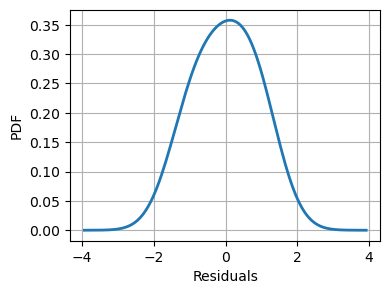

In [8]:
graph = ot.KernelSmoothing().build(residuals_sample).drawPDF()
graph.setLegends([""])
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

We should perhaps compare that the distribution of the residuals is close to the gaussian distribution that is computed from the estimated standard deviation: this is done a little later in the script. 

## Compute the distribution of the coefficients

The basis corresponds to the linear model:
$$
Y = \beta_0 \phi_0(\boldsymbol{x}) + \beta_1 \phi_1(\boldsymbol{x}) + \ldots + \beta_p \phi_p(\boldsymbol{x})
$$
for any $\boldsymbol{x} \in \mathbb{R}^p$ where 
$$
\phi_0(\boldsymbol{x}) = 1
$$
and 
$$
\phi_i(\boldsymbol{x}) = x_i
$$
for $i = 1, ..., p$.

In [9]:
def define_linear_basis(dimension):
    """
    Compute a basis suitable for linear regression.

    This basis corresponds to the linear regression model:

    Y = beta[0] + beta[1] * X_1 + ... + beta[p] * X_p

    where p is the dimension.
    The first item of this basis corresponds to the intercept, i.e.
    the function is constant and equal to 1.
    The remaining items are identity function, returning the corresponding
    input variable.

    Parameters
    ----------
    dimension : int
        The number of dimensions of the input variable X.

    Returns
    -------
    basis : ot.Basis(1 + dimension)
        The functional basis.
    """
    list_of_inputs = ["x%d" % (i) for i in range(dimension)]
    # The intercept
    basis_list = []
    constant_function = ot.SymbolicFunction(list_of_inputs, ["1"])
    basis_list.append(constant_function)
    # The remaining functions
    for i in range(dimension):
        identity_function = ot.SymbolicFunction(list_of_inputs, ["x%d" % (i)])
        basis_list.append(identity_function)
    basis = ot.Basis(basis_list)
    return basis

In [10]:
dimension = distribution.getDimension()
basis = define_linear_basis(dimension)
print(basis)

Basis( [[x0,x1,x2]->[1],[x0,x1,x2]->[x0],[x0,x1,x2]->[x1],[x0,x1,x2]->[x2]] )


The `DesignProxy` contains the algorithm to evaluate the design matrix $X$. 

In [11]:
design_proxy = ot.DesignProxy(input_sample, basis)
indices = list(range(1 + dimension))
print("indices : ", indices)
design_matrix = design_proxy.computeDesign(indices)
print(design_matrix)

indices :  [0, 1, 2, 3]
10x4
[[  1          0.608202  -0.470526   0.322925  ]
 [  1         -1.26617    0.261018   0.445785  ]
 [  1         -0.438266  -2.29006   -1.03808   ]
 [  1          1.20548   -1.28289   -0.856712  ]
 [  1         -2.18139   -1.31178    0.473617  ]
 [  1          0.350042  -0.0907838 -0.125498  ]
 [  1         -0.355007   0.995793   0.351418  ]
 [  1          1.43725   -0.139453   1.78236   ]
 [  1          0.810668  -0.560206   0.0702074 ]
 [  1          0.793156   0.44549   -0.781366  ]]


In [12]:
n_parameters = len(basis)
residuals_point = residuals_sample.asPoint()
sigma2_hat = residuals_point.normSquare() / (sample_size - n_parameters)
print("hat(sigma)^2 = %.4f" % (sigma2_hat))

hat(sigma)^2 = 0.9903


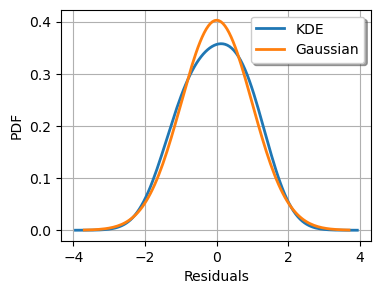

In [13]:
noise_estimated = ot.Normal(0.0, sigma2_hat)

graph = ot.KernelSmoothing().build(residuals_sample).drawPDF()
graph.setLegends(["KDE"])
curve = noise_estimated.drawPDF()
curve.setLegends(["Gaussian"])
graph.add(curve)
number_of_graphs = len(graph.getDrawables())
graph.setColors(ot.Drawable().BuildDefaultPalette(number_of_graphs))
graph.setLegendPosition("topright")
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

Since the distribution of the residuals is close to a gaussian distribution, the least squares method is appropriate.

In [14]:
lsq_method = ot.QRMethod(design_proxy, indices)
print(lsq_method)

class=QRMethod


The following cell computes the solution $\hat{\boldsymbol{\beta}}$ of the linear least squares problem. It uses the `solve` method of the problem.

In [15]:
observation_point = observation_sample.asPoint()
beta_hat = lsq_method.solve(observation_point)
print(beta_hat)

[1.33725,1.8452,-2.61505,4.07332]


In order to compute the covariance matrix of $\hat{\boldsymbol{\beta}}$, we use the `getGramInverse` method. 

In [16]:
inverse_gram = lsq_method.getGramInverse()
covariance_matrix = ot.CovarianceMatrix(sigma2_hat * inverse_gram)
print(covariance_matrix)

[[  0.134106  -0.0171761  0.069096  -0.0422373 ]
 [ -0.0171761  0.0857609 -0.0184144  0.0112744 ]
 [  0.069096  -0.0184144  0.14205   -0.0651911 ]
 [ -0.0422373  0.0112744 -0.0651911  0.188993  ]]


We then use the `Normal` class to create the distribution of the random vector $\hat{\boldsymbol{\beta}}$. 

In [17]:
distribution_betahat = ot.Normal(beta_hat, covariance_matrix)
description = [r"$\beta_%d$" % (i) for i in range(n_parameters)]
distribution_betahat.setDescription(description)
print(distribution_betahat)

Normal(mu = [1.33725,1.8452,-2.61505,4.07332], sigma = [0.366205,0.29285,0.376895,0.434733], R = [[  1         -0.160161   0.500621  -0.265308  ]
 [ -0.160161   1         -0.166837   0.0885574 ]
 [  0.500621  -0.166837   1         -0.397874  ]
 [ -0.265308   0.0885574 -0.397874   1         ]])


Visualising a multivariate gaussian random vector is not that easy. In order to simplify the task, the following code plots the various marginals of the distribution of the random vector $\hat{\boldsymbol{\beta}}$.  

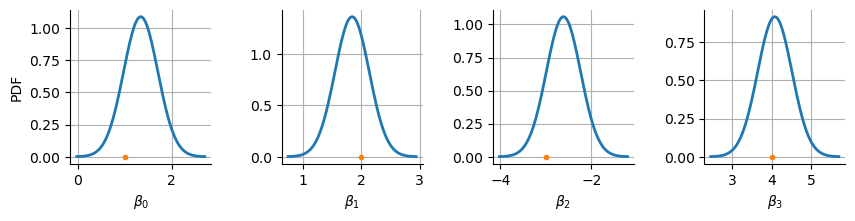

In [18]:
beta_exact = ot.Point([1.0, 2.0, -3.0, 4.0])

grid = ot.GridLayout(1, n_parameters)
for i in range(n_parameters):
    beta_i_distribution = distribution_betahat.getMarginal(i)
    graph = beta_i_distribution.drawPDF()
    graph.setLegends([""])
    cloud = ot.Cloud([[beta_exact[i]]], [[0.0]])
    cloud.setPointStyle("bullet")
    graph.add(cloud)
    number_of_graphs = len(graph.getDrawables())
    graph.setColors(ot.Drawable().BuildDefaultPalette(number_of_graphs))
    if i > 0:
        graph.setYTitle("")
    grid.setGraph(0, i, graph)
view = otv.View(grid, figure_kw={"figsize": (10.0, 2.0)})
pl.subplots_adjust(wspace=0.5)

The exact value of each parameter is indicated by a point on the X axis. We can check that the gaussian distribution is correctly spread around the exact value.

## Considering another basis

One of the goals of the `DesignProxy` proxy class is to be able to consider a basis of functions and subsets of this basis. In this section, we explore both topics.

Let $P$ be an integer representing the number of basis functions. Consider for example the basis of multivariate Hermite polynomials:
$$
Y = \sum_{i = 0}^P \beta_i \psi_i(\boldsymbol{x})
$$
for any $\boldsymbol{x} \in \mathbb{R}^p$ where 
the functions $\left\{\psi_i\right\}_{i\geq 0}$ are created by tensorisation of the probabilistic Hermite orthonormal polynomials. 

The first 5 polynomials are:
$$
\psi_0(\boldsymbol{x}) = 1
$$

$$
\psi_1(\boldsymbol{x}) = \widetilde{He}_1(x_1), \quad 
\psi_2(\boldsymbol{x}) = \widetilde{He}_1(x_2), \quad 
\psi_3(\boldsymbol{x}) = \widetilde{He}_1(x_3), \quad 
\psi_4(\boldsymbol{x}) = \widetilde{He}_1(x_4).
$$


This is straightforward, since the input random vector $\boldsymbol{x}$ has a standard normal distribution. If this vector had a non standard gaussian distribution, then we would have to first standardize the input sample.

We can create the multivariate basis using the `OrthogonalProductPolynomialFactory` class. This class creates multivariate polynomials that can be created using the `build` method.

In [19]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_x1, dist_x2, dist_x3])

number_of_basis_functions = 7  # Tune this parameter to match your requirements

basis_list = []
list_of_inputs = ["x0", "x1", "x2"]
for i in range(number_of_basis_functions):
    basis_function = multivariateBasis.build(i)
    basis_list.append(basis_function)
basis = ot.Basis(basis_list)
print(basis)

Basis( [1,x0,x1,x2,-0.707107 + 0.707107 * x0^2,x0 * x1,x0 * x2] )


The `DesignProxy` contains the algorithm to evaluate the design matrix $X$. 

In [20]:
design_proxy = ot.DesignProxy(input_sample, basis)
indices = list(range(number_of_basis_functions))
print("indices : ", indices)
design_matrix = design_proxy.computeDesign(indices)

indices :  [0, 1, 2, 3, 4, 5, 6]


In [21]:
lsq_method = ot.QRMethod(design_proxy, indices)
beta_hat = lsq_method.solve(observation_point)
print(beta_hat)

[1.1133,2.58608,-2.69806,4.71003,0.167543,0.372584,-0.896732]


The `indices` input argument allows to select a subset of the functional basis. This can be used to use a model selection method (such as the Least Angle Regression Stepwise or LASSO methods), and still use the object to estimate the coefficients corresponding to the selected functions.

Assume for example that we want to estimate the model corresponding to the indices $(0, 3, 5)$. This is the model:
$$
Y = \beta_0 \psi_0(\boldsymbol{x}) + \beta_3 \psi_3(\boldsymbol{x})+ \beta_5 \psi_5(\boldsymbol{x})
$$
for any $\boldsymbol{x} \in \mathbb{R}^p$. These indices corresponds to the indices of the multivariate polynomials according to the enumeration rule in the `build` method. The indices must match to the corresponding columns of the `design_proxy` that is, to the columns of the design matrix $X$.  

In [22]:
indices = [0, 3, 4, 5]
lsq_method = ot.QRMethod(design_proxy, indices)
beta_hat = lsq_method.solve(observation_point)
print(beta_hat)

[2.72471,2.34558,1.20904,-1.03686]


There are 4 coefficients, which correspond to the number of selected indices.